In [1]:
import pandas as pd
import matplotlib.pyplot as plt

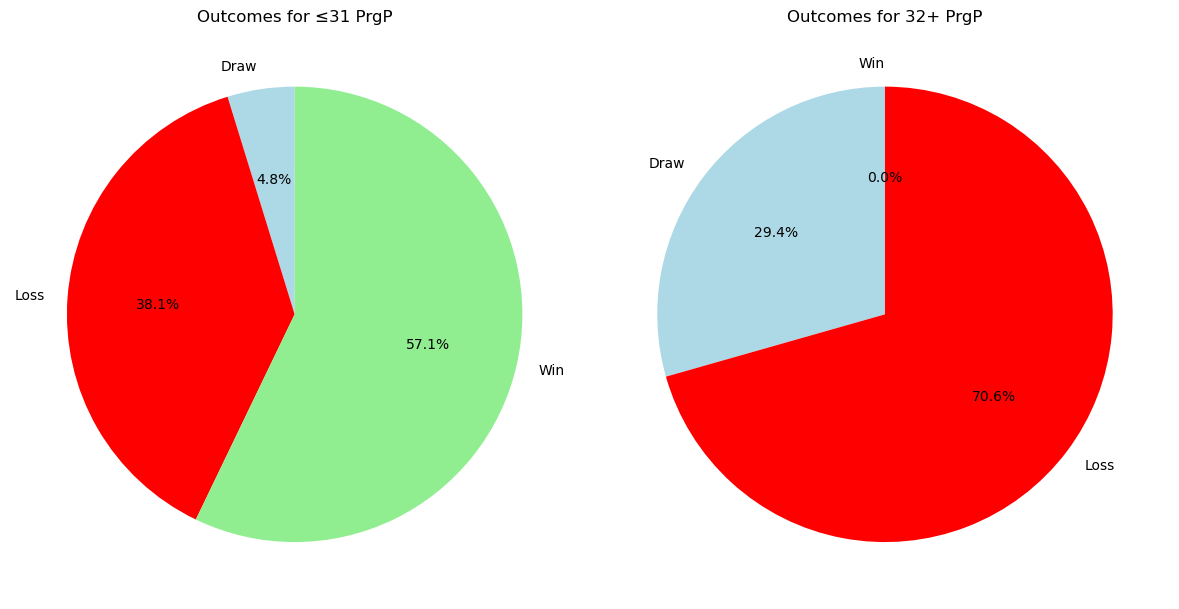

In [2]:
xls = pd.ExcelFile("wolves_passing_matchlogs.xlsx")
df = pd.read_excel(xls, sheet_name="wolves_passing_matchlogs")
df['PrgP Category'] = df['PrgP'].apply(lambda x: '≤31 PrgP' if x <= 31 else '32+ PrgP')
df['Outcome'] = df['Result'].map({'W': 'Win', 'D': 'Draw', 'L': 'Loss'})
outcomeCounts = df.groupby('PrgP Category')['Outcome'].value_counts().unstack().fillna(0)
customColors = {'Win': 'lightgreen', 'Draw': 'lightblue', 'Loss': 'red'}
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, category in enumerate(['≤31 PrgP', '32+ PrgP']):
    counts = outcomeCounts.loc[category]
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=[customColors[label] for label in counts.index],
        startangle=90
    )
    axes[i].set_title(f'Outcomes for {category}')

plt.tight_layout()
plt.show()

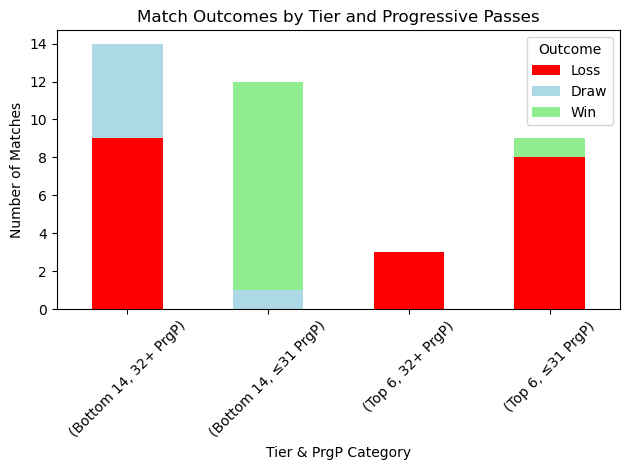

In [3]:
tierCounts = df.groupby(['Tier', 'PrgP Category', 'Outcome']).size().unstack().fillna(0)
customColors = {'Win': 'lightgreen', 'Draw': 'lightblue', 'Loss': 'red'}
tierCounts = tierCounts[['Loss', 'Draw', 'Win']]
tierCounts.plot(
    kind='bar', 
    stacked=True, 
    color=[customColors['Loss'], customColors['Draw'], customColors['Win']]
)
plt.title('Match Outcomes by Tier and Progressive Passes')
plt.ylabel('Number of Matches')
plt.xlabel('Tier & PrgP Category')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()